In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import string
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, pipeline, linear_model

In [3]:
# Load the CSV file
df = pd.read_csv('/content/Language Detection.csv')  # Replace with your actual CSV file name

# Define the text column (the column containing the text data)
text_column = 'Text'  # Replace with the actual column name

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Function to preprocess text: remove punctuation, convert to lowercase, and handle extra whitespace
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove numbers
        text = ''.join([char for char in text if not char.isdigit()])
        # Remove punctuation
        text = text.translate(translator)
        # Remove extra whitespace
        text = " ".join(text.split())
    return text

# Apply preprocessing to the text column without saving to a CSV file
df[text_column] = df[text_column].apply(preprocess_text)

# Handle missing values
df['Text'].fillna('', inplace=True)  # Replace 'Text' with your actual text column name
df['Language'].fillna('unknown', inplace=True)  # Replace 'Language' with your actual target column name

# Define the features and target column
X, y = df['Text'], df['Language']  # Replace with your actual column names

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(8269,)
(2068,)
(8269,)
(2068,)


In [4]:
# Initialize TfidfVectorizer with character-level n-grams
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 3), analyzer='char')

# Create and fit the pipeline
pipe_lr_r13 = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', linear_model.LogisticRegression())
])

# Fit the pipeline on the training data
pipe_lr_r13.fit(X_train, y_train)

print("Pipeline fitted successfully.")


Pipeline fitted successfully.


In [5]:
y_predicted = pipe_lr_r13.predict(X_test)

In [10]:
# Calculate accuracy
acc = metrics.accuracy_score(y_test, y_predicted) * 100
print(f"Accuracy: {acc:.2f}%")

# Print classification report
class_report = metrics.classification_report(y_test, y_predicted)
print("Classification Report:")
print(class_report)

Accuracy: 98.02%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       117
      Danish       0.94      0.94      0.94        77
       Dutch       0.96      0.97      0.97       106
     English       0.98      0.98      0.98       260
      French       0.99      0.99      0.99       195
      German       1.00      0.95      0.98       105
       Greek       1.00      1.00      1.00        70
       Hindi       1.00      1.00      1.00        18
     Italian       0.96      0.95      0.96       152
     Kannada       1.00      1.00      1.00        77
   Malayalam       1.00      1.00      1.00       114
  Portugeese       0.97      0.98      0.97       150
     Russian       1.00      1.00      1.00       142
     Spanish       0.95      0.96      0.96       158
    Sweedish       0.98      0.97      0.97       139
       Tamil       1.00      1.00      1.00        91
     Turkish       0.97      0.99      0.

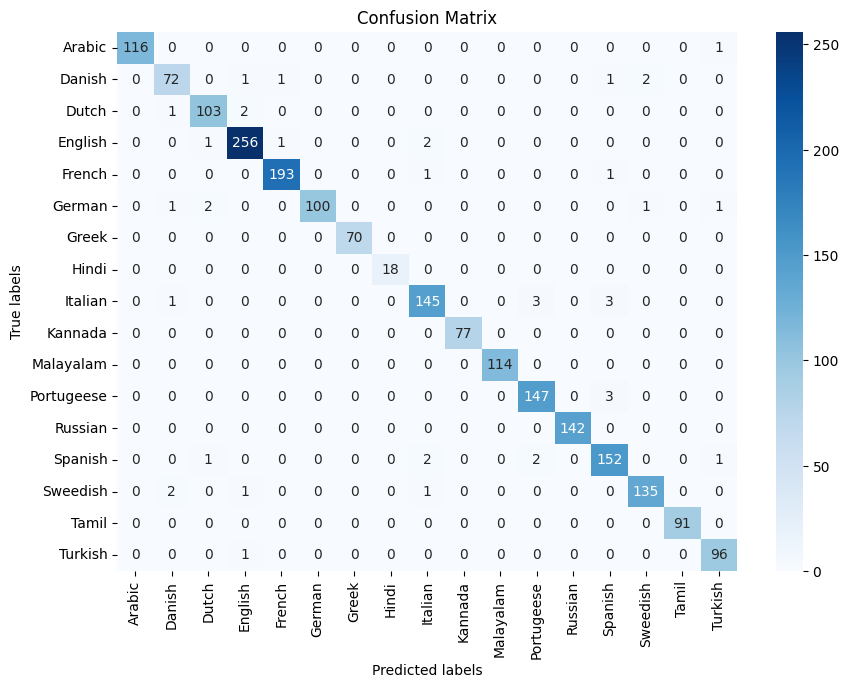

In [7]:
matrix = metrics.confusion_matrix(y_test,y_predicted)
# Get labels for the confusion matrix
labels = sorted(y_test.unique())  # Assuming labels are categorical and sorted

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe_lr_r13, file)

print("Model saved to 'model.pkl'.")


Model saved to 'model.pkl'.
